In [ ]:
import pandas as pd
import plotly.express as px
#import plotly.io as pio
#from IPython.display import Image
#pio.renderers.default = "png"  # Convert plots to static PNG images

## Configuration variables

In [3]:
granularity = 'second' # you can change to 'minute'
bucket_column = f"{granularity}_bucket"
# These filters are used to limit the data when granularity is 'second', otherwise the plot might crash. Feel free to change them.
from_timestamp = pd.to_datetime('2025-03-28 00:00:00.000 +0100')
to_timestamp = pd.to_datetime('2025-03-29 00:00:00.000 +0100')

## Read the data from the CSV files


In [4]:
df = pd.read_csv(f"../data/water_consumption_by_{granularity}.csv", parse_dates=[bucket_column])
df.sort_values(bucket_column, inplace=True)

# Filter the data if granularity is 'second'
if granularity == 'second':
    df = df[(df[bucket_column] >= from_timestamp) & (df[bucket_column] <= to_timestamp)]

df.head()

,second_bucket,pulse_count,liters,inserted_at
103070,2025-03-28 00:00:00+01:00,50.0,0.083112,2025-04-03 20:23:14.110 +0200
103071,2025-03-28 00:00:01+01:00,50.0,0.083112,2025-04-03 20:23:14.110 +0200
103072,2025-03-28 00:00:02+01:00,50.0,0.083112,2025-04-03 20:23:14.110 +0200
103073,2025-03-28 00:00:03+01:00,50.0,0.083112,2025-04-03 20:23:14.110 +0200
103074,2025-03-28 00:00:04+01:00,50.0,0.083112,2025-04-03 20:23:14.110 +0200


In [5]:
df_events = pd.read_csv("../data/event_labels.csv", parse_dates=["start_timestamp", "end_timestamp"])

# Filter the data if granularity is 'second'
if granularity == 'second':
    df_events = df_events[(df_events["end_timestamp"] >= from_timestamp) & (df_events["start_timestamp"] <= to_timestamp)]

df_events.head(20)

,category,tag,start_timestamp,end_timestamp
21,Ducha,#Hijo,2025-03-27 23:57:48.768000+01:00,2025-03-28 00:04:35.987000+01:00
22,Grifo,NaN,2025-03-28 00:06:34.087000+01:00,2025-03-28 00:06:56.241000+01:00
23,Grifo,NaN,2025-03-28 00:11:46.847000+01:00,2025-03-28 00:12:06.577000+01:00
24,Cisterna,NaN,2025-03-28 03:02:21.701000+01:00,2025-03-28 03:04:23.373000+01:00
25,Cisterna,#Papá,2025-03-28 06:01:59.649000+01:00,2025-03-28 06:03:30.249000+01:00
26,Ducha,#Mamá,2025-03-28 06:07:29.603000+01:00,2025-03-28 06:11:45.796000+01:00
27,Ducha,#Papá,2025-03-28 07:17:57.855000+01:00,2025-03-28 07:21:21.430000+01:00
28,Cisterna,#Papá,2025-03-28 06:49:47.776000+01:00,2025-03-28 06:50:46.829000+01:00
29,Lavaplatos,NaN,2025-03-28 07:34:28.333000+01:00,2025-03-28 08:14:30.014000+01:00
30,Lavaplatos,NaN,2025-03-28 11:36:14.134000+01:00,2025-03-28 12:24:04.908000+01:00


## Plot the water consumption time series

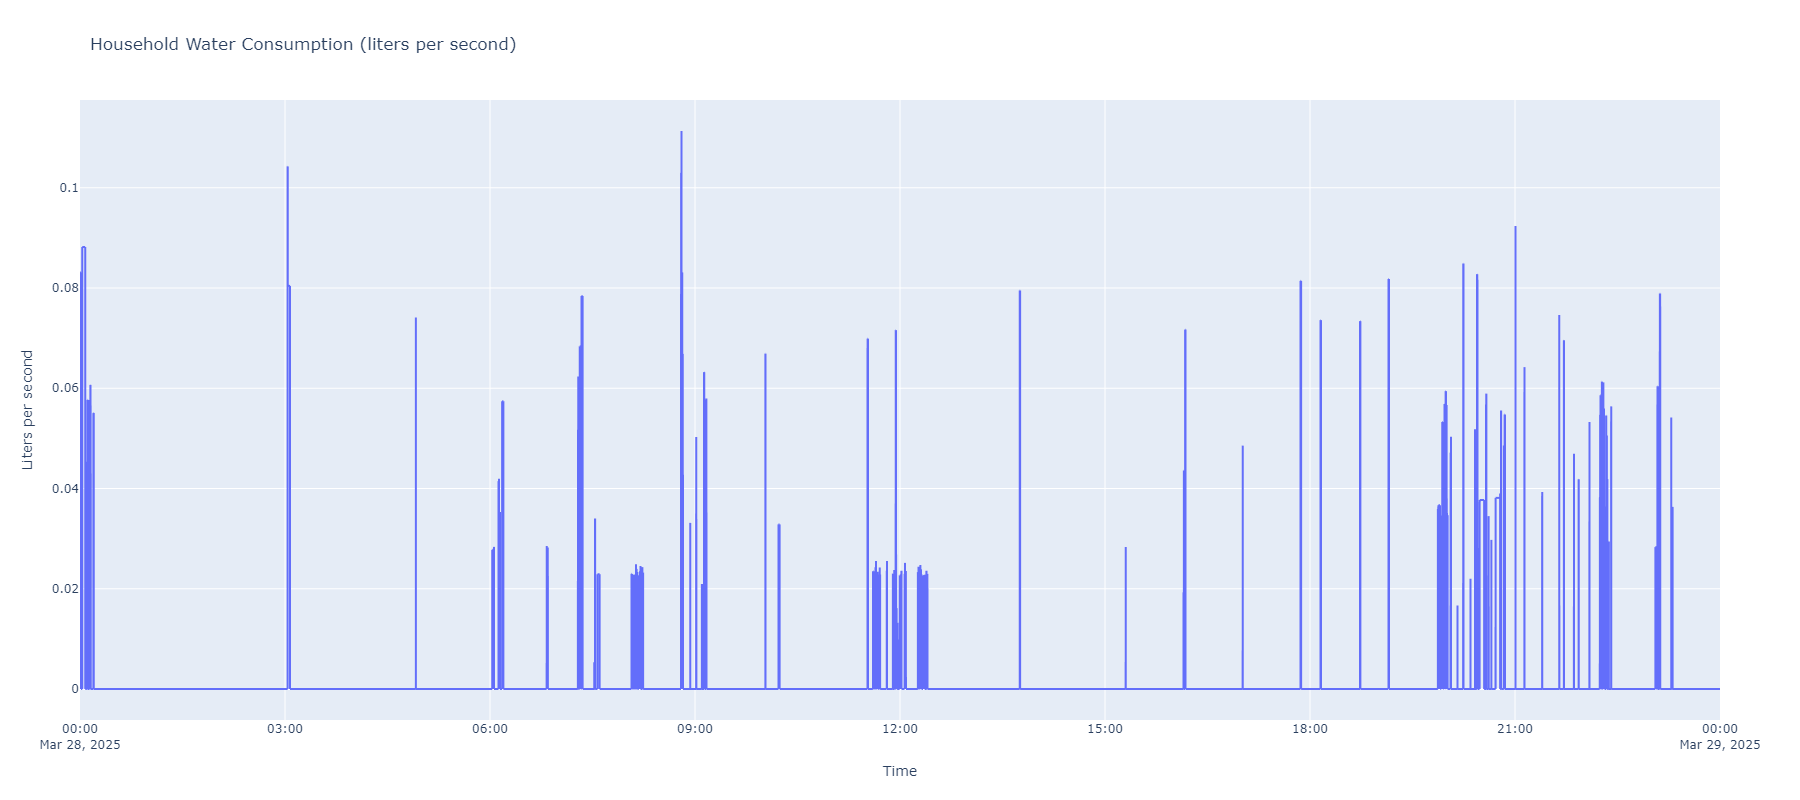

In [ ]:
fig = px.line(
    df,
    x=bucket_column, 
    y="liters",
    title=f"Household Water Consumption (liters per {granularity})",
    labels={bucket_column: "Tiempo", "liters": "Litros"}
)

fig.update_layout(
    xaxis_title="Time",
    yaxis_title=f"Liters per {granularity}",
    height=800,
    width=600*3
)

fig.show()
#fig.write_image("water-consumption-time-series.png")
#Image("water-consumption-time-series.png")

## Add the event labels

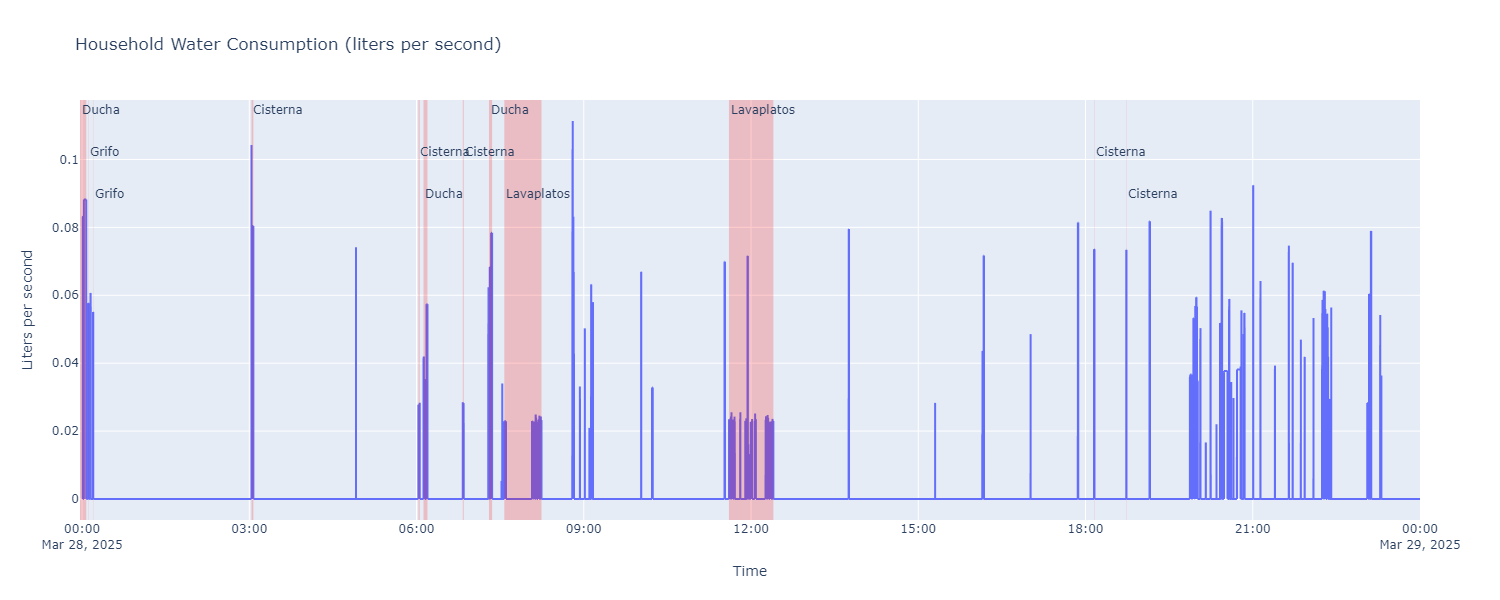

In [ ]:

label_y_positions = [1.0, 0.9, 0.8]
label_index = 0
for _, row in df_events.iterrows():
    y_position = label_y_positions[label_index % len(label_y_positions)]
    label_index += 1
    fig.add_vrect(
        x0=row["start_timestamp"], x1=row["end_timestamp"],
        fillcolor="red", opacity=0.2, line_width=0,
        annotation_text=row["category"],
        annotation_position="top left",
        annotation_yref="paper",
        annotation_y=y_position
    )

fig.show()
#fig.write_image("consumption-time-series-labeled.png")
#Image("consumption-time-series-labeled.png")